In [ ]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.6 MB/s eta 0:00:00


In [ ]:
!pip install hdbscan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 30.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039283 sha256=192ff9d5fd78cf842bca604b1d8a57e3e86531eced801bfaead7eaa4cca90900
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
Successfully built hdbscan
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.8
    Uninstalling Cython-3.0.8:
      Successfully uninstalled Cython-3.0.8


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import ClusterCentroids
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek

from category_encoders.ordinal import OrdinalEncoder


from imblearn.under_sampling import NearMiss

from sklearn.tree import DecisionTreeClassifier


from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (precision_score,
                             recall_score,
                             f1_score,
                             confusion_matrix,
                             classification_report,
                             ConfusionMatrixDisplay,
                             mean_absolute_error,
                             accuracy_score,
                             recall_score,
                             f1_score,
                             auc,
                             roc_auc_score, roc_curve, log_loss)



from sklearn.neighbors import (KNeighborsClassifier,
                               RadiusNeighborsClassifier)

from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans, AgglomerativeClustering
from hdbscan import HDBSCAN

from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.metrics.cluster import pair_confusion_matrix

In [ ]:
df = pd.read_csv('german_credit.csv')
df.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,3-Feb,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,3-Feb,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,3-Feb,unskilled - resident,0 to 2,no,yes,good


In [ ]:
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   status                   1000 non-null   object
 1   duration                 1000 non-null   int64 
 2   credit_history           1000 non-null   object
 3   purpose                  1000 non-null   object
 4   amount                   1000 non-null   int64 
 5   savings                  1000 non-null   object
 6   employment_duration      1000 non-null   object
 7   installment_rate         1000 non-null   object
 8   personal_status_sex      1000 non-null   object
 9   other_debtors            1000 non-null   object
 10  present_residence        1000 non-null   object
 11  property                 1000 non-null   object
 12  age                      1000 non-null   int64 
 13  other_installment_plans  1000 non-null   object
 14  housing                  1000 non-null   

In [ ]:
enc = LabelEncoder()
df["status"] = enc.fit_transform(df["status"])
df["credit_history"] = enc.fit_transform(df["credit_history"])
df["purpose"] = enc.fit_transform(df["purpose"])
df["savings"] = enc.fit_transform(df["savings"])
df["employment_duration"] = enc.fit_transform(df["employment_duration"])
df["installment_rate"] = enc.fit_transform(df["installment_rate"])
df["personal_status_sex"] = enc.fit_transform(df["personal_status_sex"])
df["other_debtors"] = enc.fit_transform(df["other_debtors"])
df["present_residence"] = enc.fit_transform(df["present_residence"])
df["property"] = enc.fit_transform(df["property"])
df["other_installment_plans"] = enc.fit_transform(df["other_installment_plans"])
df["housing"] = enc.fit_transform(df["housing"])
df["number_credits"] = enc.fit_transform(df["number_credits"])
df["job"] = enc.fit_transform(df["job"])
df["people_liable"] = enc.fit_transform(df["people_liable"])
df["telephone"] = enc.fit_transform(df["telephone"])
df["foreign_worker"] = enc.fit_transform(df["foreign_worker"])
df["credit_risk"] = enc.fit_transform(df["credit_risk"])
df.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,3,18,0,2,1049,4,2,2,0,2,...,1,21,1,0,0,1,0,0,0,1
1,3,9,0,5,2799,4,0,1,3,2,...,3,36,1,0,1,1,1,0,0,1
2,0,12,4,8,841,0,1,1,0,2,...,3,23,1,0,0,3,0,0,0,1
3,3,12,0,5,2122,4,0,0,3,2,...,3,39,1,0,1,3,1,0,1,1
4,3,12,0,5,2171,4,0,2,3,2,...,1,38,0,2,1,3,0,0,1,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
silhouette_scores = []
davies_bouldin_scores = []
calinski_harabasz_scores = []
distortions = []
for i in range(2, 100):
  kmeans = KMeans(n_clusters=i, random_state=0, n_init="auto").fit(df_scaled)
  print(kmeans.n_features_in_)
  ss = silhouette_score(df_scaled, kmeans.labels_)
  silhouette_scores.append(ss)
  dbs = davies_bouldin_score(df_scaled, kmeans.labels_)
  davies_bouldin_scores.append(dbs)
  chs = calinski_harabasz_score(df_scaled, kmeans.labels_)
  calinski_harabasz_scores.append(chs)
  distortions.append(kmeans.inertia_)
  print(kmeans.inertia_, ss, dbs, chs)

21
2176.8527394763155 0.09187137124788386 3.0549955219242997 100.77344546627532
21
2020.5757085033026 0.09589806889907694 2.653254108233559 92.78477924977034
21
1896.1019112113743 0.092945531576823 2.4999185231271923 87.64598493674164
21
1827.0923576514756 0.08023826523689731 2.555990043380578 77.54412395578117
21
1754.8770938854234 0.0961840475119824 2.3371161780516276 72.70406691135076
21
1691.2688217343234 0.09355603226419071 2.3740165251077596 69.02655265938255
21
1660.3783051233602 0.08550884315865814 2.4913871937065712 62.84219652544774
21
1625.0473814382262 0.08438190904591893 2.4851262178451226 58.81900809508668
21
1575.2110657077976 0.0862063339582073 2.413533296635862 57.36344072097901
21
1541.7692994921288 0.08933148798917932 2.3313434184446242 54.83882680378366
21
1517.0438868295814 0.08961044930770282 2.3685710569878373 52.078676234024684
21
1487.0539462969468 0.09405271092888808 2.3169625963093217 50.31102310745548
21
1460.322265460204 0.09388912281898888 2.26098775385172

In [ ]:
cols = df.columns.tolist()

In [ ]:
df_scaled = pd.DataFrame(data = df_scaled, columns = cols)

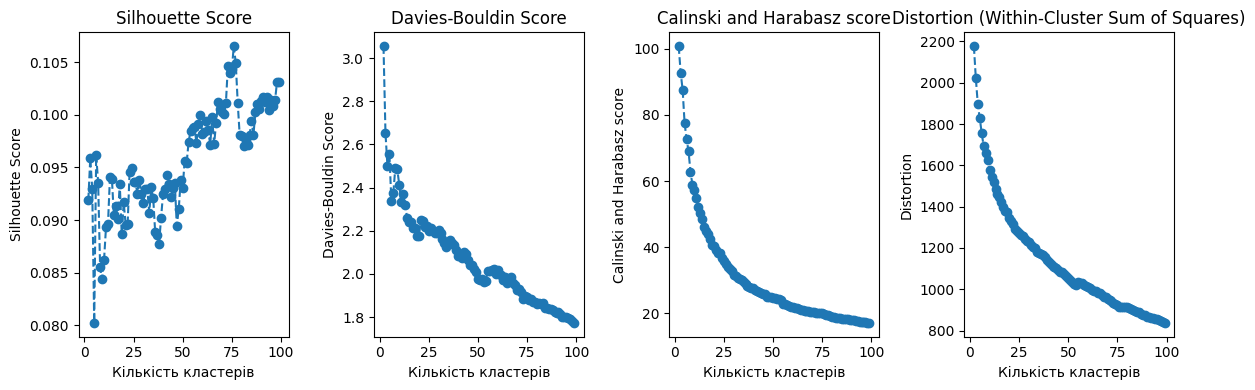

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 4, 1)
plt.plot(range(2, 100), silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Кількість кластерів')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')

plt.subplot(1, 4, 2)
plt.plot(range(2, 100), davies_bouldin_scores, marker='o', linestyle='--')
plt.xlabel('Кількість кластерів')
plt.ylabel('Davies-Bouldin Score')
plt.title('Davies-Bouldin Score')

plt.subplot(1, 4, 3)
plt.plot(range(2, 100), calinski_harabasz_scores, marker='o', linestyle='--')
plt.xlabel('Кількість кластерів')
plt.ylabel('Calinski and Harabasz score')
plt.title('Calinski and Harabasz score')

plt.subplot(1, 4, 4)
plt.plot(range(2, 100), distortions, marker='o', linestyle='--')
plt.xlabel('Кількість кластерів')
plt.ylabel('Distortion')
plt.title('Distortion (Within-Cluster Sum of Squares)')

plt.tight_layout()
plt.show()


In [ ]:
def angles(scores, rng):
  angles_list = []
  for i in range(3, 10):
    x1 = i - 1
    y1 = scores[i-3]
    x2 = i
    y2 = scores[i-2]
    x3 = i+1
    y3 = scores[i-1]
    vector1 = [x2-x1, y2-y1]
    vector2 = [x3-x2, y3-y2]
    unit_vector_1 = vector1 / np.linalg.norm(vector1)
    unit_vector_2 = vector2 / np.linalg.norm(vector2)
    dot_product = np.dot(unit_vector_1, unit_vector_2)
    angle = np.arccos(dot_product)
    angles_list.append(angle)
  return angles_list

def most_frequent(scores):
    unique, counts = np.unique(scores, return_counts=True)
    index = np.argmax(counts)
    return unique[index]

In [ ]:
cluster_silhouette1 = silhouette_scores.index(max(silhouette_scores))+2

cluster_davies_bouldin1 = davies_bouldin_scores.index(min(davies_bouldin_scores))+2

calinski_harabasz1 = calinski_harabasz_scores.index(max(calinski_harabasz_scores))+2

distortions_angles1 = angles(distortions, (3,10))
distortion1 = distortions_angles1.index(max(distortions_angles1))+2

scores = [cluster_silhouette1, cluster_davies_bouldin1, calinski_harabasz1, distortion1]

print(f"Most Optimal Number of Clusters According To Method:\nSilhouette: {cluster_silhouette1}\nDavies-Bouldin:{cluster_davies_bouldin1}\nCalinski-Harabasz: {calinski_harabasz1}\nDistortion:{distortion1}")


Most Optimal Number of Clusters According To Method:
Silhouette: 76
Davies-Bouldin:99
Calinski-Harabasz: 2
Distortion:6


In [ ]:
from sklearn.cluster import AffinityPropagation


In [ ]:


affinity_propagation = AffinityPropagation()

affinity_propagation.fit(df_scaled)
labels = affinity_propagation.labels_

clusters_num_affinity_propagation1 = len(np.unique(labels))


print(f"Clusters number {len(np.unique(labels))}")

Clusters number 76


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


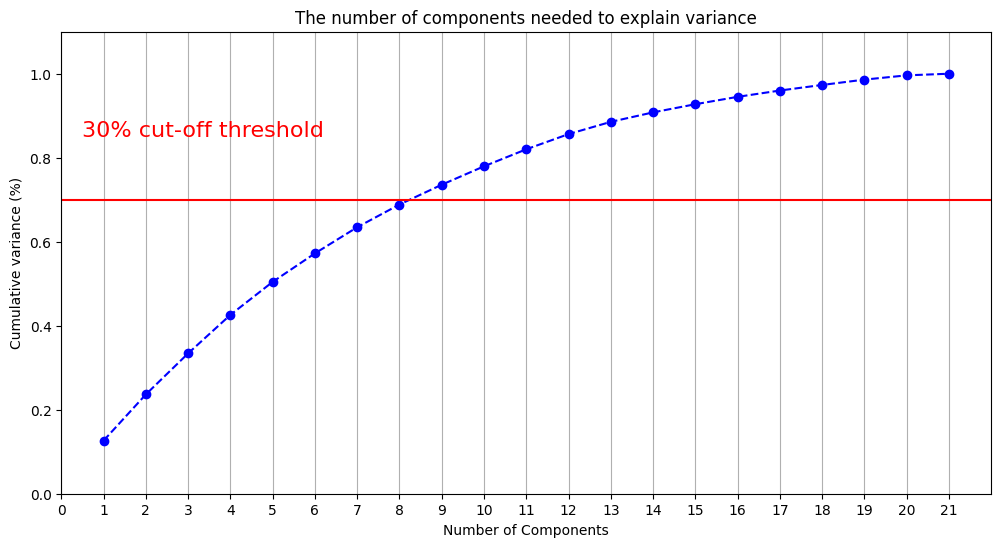

In [ ]:

pca = PCA(n_components = 0.7)
pca.fit(df_scaled)
reduced = pca.transform(df_scaled)

pca = PCA().fit(df_scaled)

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, df_scaled.shape[1]+1, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, df_scaled.shape[1]+1, step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.7, color='r', linestyle='-')
plt.text(0.5, 0.85, '30% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [ ]:
silhouette_scores = []
davies_bouldin_scores = []
calinski_harabasz_scores = []
distortions = []
for i in range(2, 52):
  kmeans = KMeans(n_clusters=i, random_state=0, n_init="auto").fit(reduced)
  print(kmeans.n_features_in_)
  ss = silhouette_score(reduced, kmeans.labels_)
  silhouette_scores.append(ss)
  dbs = davies_bouldin_score(reduced, kmeans.labels_)
  davies_bouldin_scores.append(dbs)
  chs = calinski_harabasz_score(reduced, kmeans.labels_)
  calinski_harabasz_scores.append(chs)
  distortions.append(kmeans.inertia_)
  print(kmeans.inertia_, ss, dbs, chs)



9
1499.6097424120512 0.15203855581968118 2.2978066465541445 175.49009692693855
9
1389.459437813406 0.1335184353867738 2.1994280902328365 134.12511676941574
9
1301.526010751467 0.13047668995409487 2.367555561270977 117.79266898722382
9
1207.749403698117 0.13475638385673247 2.2519189249862763 114.4228703890914
9
1133.338619141288 0.1260706608188018 2.0492150389080175 110.50278686620425
9
1088.0765642039146 0.1400434554046954 1.9411058477811611 102.70426684296287
9
1016.5620300702992 0.14669245695974864 1.9550172735541045 104.0998698830585
9
984.1012478609593 0.1486111838759708 1.857452179535211 98.08311397036573
9
957.1063313529455 0.13877938759250794 1.907392296747322 92.65607957774806
9
936.089049419445 0.13957153592354593 1.8438820130597904 87.39717428606436
9
914.9170141030221 0.1421453201324816 1.826285234940256 83.28685167624309
9
881.1294859881999 0.14491113197212177 1.7923603349332293 82.34752964483741
9
845.9362177500045 0.15561057695741487 1.7641720251104949 82.25064789121274
9

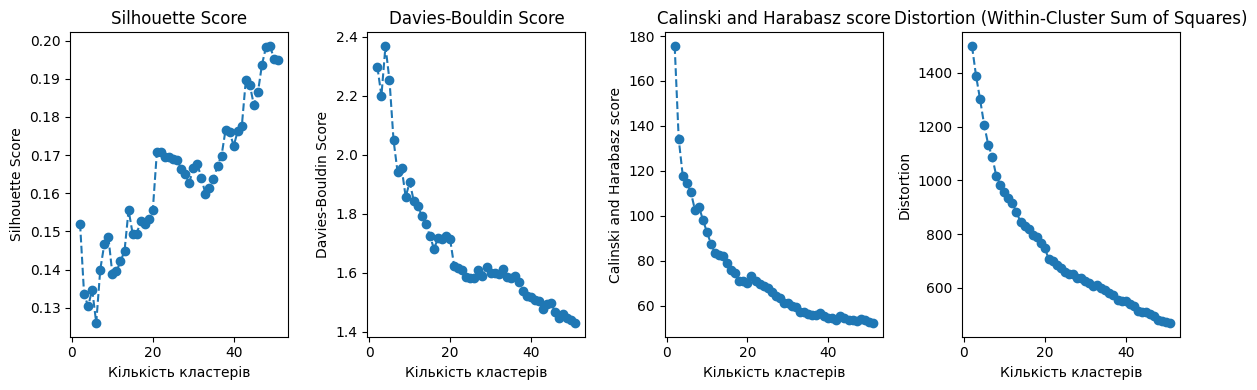

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 4, 1)
plt.plot(range(2, 52), silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Кількість кластерів')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')

plt.subplot(1, 4, 2)
plt.plot(range(2, 52), davies_bouldin_scores, marker='o', linestyle='--')
plt.xlabel('Кількість кластерів')
plt.ylabel('Davies-Bouldin Score')
plt.title('Davies-Bouldin Score')

plt.subplot(1, 4, 3)
plt.plot(range(2, 52), calinski_harabasz_scores, marker='o', linestyle='--')
plt.xlabel('Кількість кластерів')
plt.ylabel('Calinski and Harabasz score')
plt.title('Calinski and Harabasz score')

plt.subplot(1, 4, 4)
plt.plot(range(2, 52), distortions, marker='o', linestyle='--')
plt.xlabel('Кількість кластерів')
plt.ylabel('Distortion')
plt.title('Distortion (Within-Cluster Sum of Squares)')

plt.tight_layout()
plt.show()


In [ ]:
cluster_silhouette2 = silhouette_scores.index(max(silhouette_scores))+2

cluster_davies_bouldin2 = davies_bouldin_scores.index(min(davies_bouldin_scores))+2

calinski_harabasz2 = calinski_harabasz_scores.index(max(calinski_harabasz_scores))+2

distortions_angles2 = angles(distortions, (3,10))
distortion2 = distortions_angles2.index(max(distortions_angles2))+2
scores2 = [cluster_silhouette2, cluster_davies_bouldin2, calinski_harabasz2, distortion2]

print(f"Most Optimal Number of Clusters According To Method:\nSilhouette: {cluster_silhouette2}\nDavies-Bouldin:{cluster_davies_bouldin2}\nCalinski-Harabasz: {calinski_harabasz2}\nDistortion:{distortion2}\n")


Most Optimal Number of Clusters According To Method:
Silhouette: 49
Davies-Bouldin:51
Calinski-Harabasz: 2
Distortion:7



In [ ]:
silhouette_scores = []
davies_bouldin_scores = []
calinski_harabasz_scores = []
clusters_num = []



affinity_propagation = AffinityPropagation()

affinity_propagation.fit(reduced)
labels = affinity_propagation.labels_

clusters_num_affinity_propagation2 = len(np.unique(labels))

print(f"Clusters number {len(np.unique(labels))}")

Clusters number 75


In [ ]:
print(f"Most Optimal Number of Clusters According To Method(before reduction):\nSilhouette: {cluster_silhouette1}\nDavies-Bouldin:{cluster_davies_bouldin1}\nCalinski-Harabasz: {calinski_harabasz1}\nDistortion:{distortion1}")
print()
print(f"Most Optimal Number of Clusters According To Method(after reduction):\nSilhouette: {cluster_silhouette2}\nDavies-Bouldin:{cluster_davies_bouldin2}\nCalinski-Harabasz: {calinski_harabasz2}\nDistortion:{distortion2}")
print()
print()
print(f"Optimal number of clusters before reduction according to Affinity Propagation Clusterisation: {clusters_num_affinity_propagation1}\nOptimal number of clusters after reduction according to Affinity Propagation Clusterisation: {clusters_num_affinity_propagation2}")

Most Optimal Number of Clusters According To Method(before reduction):
Silhouette: 76
Davies-Bouldin:99
Calinski-Harabasz: 2
Distortion:6

Most Optimal Number of Clusters According To Method(after reduction):
Silhouette: 49
Davies-Bouldin:51
Calinski-Harabasz: 2
Distortion:7


Optimal number of clusters before reduction according to Affinity Propagation Clusterisation: 76
Optimal number of clusters after reduction according to Affinity Propagation Clusterisation: 75
